In [10]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_33e3645c5375491294db458b2613a5d5 = 'https://s3.us.cloud-object-storage.appdomain.cloud'
else:
    endpoint_33e3645c5375491294db458b2613a5d5 = 'https://s3.private.us.cloud-object-storage.appdomain.cloud'

client_33e3645c5375491294db458b2613a5d5 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='NbQ-RfLsYUyOaBguEdGjz3S7PWp894aQqiOzNsH5T39y',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_33e3645c5375491294db458b2613a5d5)

body = client_33e3645c5375491294db458b2613a5d5.get_object(Bucket='belajarmlwatson-donotdelete-pr-gajunlgvobqwyn',Key='Mall_Customers.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
# data pre-processing seragamkan nama kolom
df = df_data_1.rename(columns={
    'Gender' : 'gender',
    'Age':'age',
    'Annual Income (k$)':'annual_income',
    'Spending Score (1-100)' : 'spending_score'
})

# ubah data kategorik menjadi numerik
df['gender'].replace(['Male' , 'Female'], [1, 0], inplace=True)
df.head()

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


Text(0, 0.5, 'inersia')

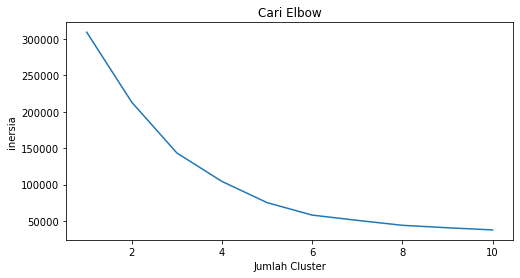

In [30]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# hilangkan kolom
X = df.drop(['CustomerID', 'gender'], axis=1)

# membuat list yang berisi inersia
clusters = []
for i in range(1,11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
# membuat plot inersia
fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Jumlah Cluster')
ax.set_ylabel('inersia')

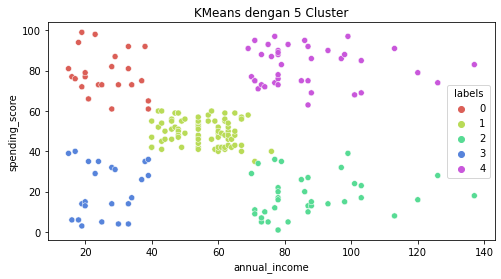

In [37]:
# Membuat objek kmeans
km5 = KMeans(n_clusters=5).fit(X)

X['labels'] = km5.labels_

plt.figure(figsize=(8,4))
sns.scatterplot(x=X['annual_income'], y=X['spending_score'], hue=X['labels'], palette=sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 Cluster')
plt.show()